# Assignment 3 

# importing needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
import phik 
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.utils import resample
from phik.report import plot_correlation_matrix
from phik import report

# importing dataset

In [3]:
df=pd.read_csv('/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv')

# PART 1 : exploring the dataset

In [4]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [6]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [8]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

### finding missing values to handle it

In [9]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [10]:
df['days_since_prior_order'][50:70]

50    6.0
51    6.0
52    6.0
53    6.0
54    6.0
55    6.0
56    6.0
57    6.0
58    6.0
59    6.0
60    6.0
61    6.0
62    6.0
63    7.0
64    7.0
65    7.0
66    7.0
67    7.0
68    7.0
69    NaN
Name: days_since_prior_order, dtype: float64

In [11]:
feature_to_impute = 'days_since_prior_order'

impute_feature = df[[feature_to_impute]].copy()
imputer = IterativeImputer(estimator=RandomForestRegressor())
imputed_values = imputer.fit_transform(impute_feature)
df[feature_to_impute] = imputed_values



In [12]:
# df['days_since_prior_order'].fillna(df['days_since_prior_order'].mean(), inplace=True)

In [13]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [14]:
df['days_since_prior_order'][50:70]

50     6
51     6
52     6
53     6
54     6
55     6
56     6
57     6
58     6
59     6
60     6
61     6
62     6
63     7
64     7
65     7
66     7
67     7
68     7
69    11
Name: days_since_prior_order, dtype: int64

## plotting some data

 ### number of orders based on hour of the day

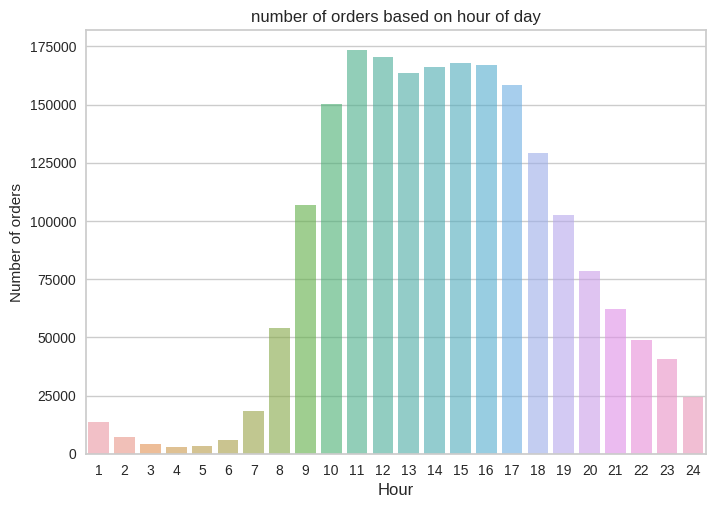

In [15]:
df['order_hour_of_day'].value_counts()

sns.countplot(data=df, x=df['order_hour_of_day'] + 1, alpha=0.6)
plt.title("number of orders based on hour of day")
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of orders")
plt.show()

 ### number of orders based on days of the week

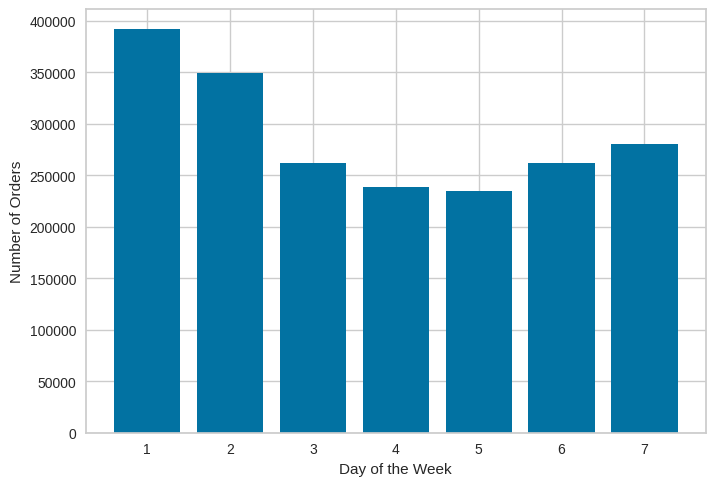

In [16]:
number_of_ord_day = df.groupby('order_dow').size()

plt.bar(number_of_ord_day.index + 1, number_of_ord_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

### which product is mostly bought by people?

In [18]:
all_products = df['product_name'].value_counts()
products = pd.DataFrame(all_products).reset_index()
products.columns = ['Product', 'Order Count']
top_products = products.sort_values(by='Order Count', ascending=False)
top_products = top_products[0:20]

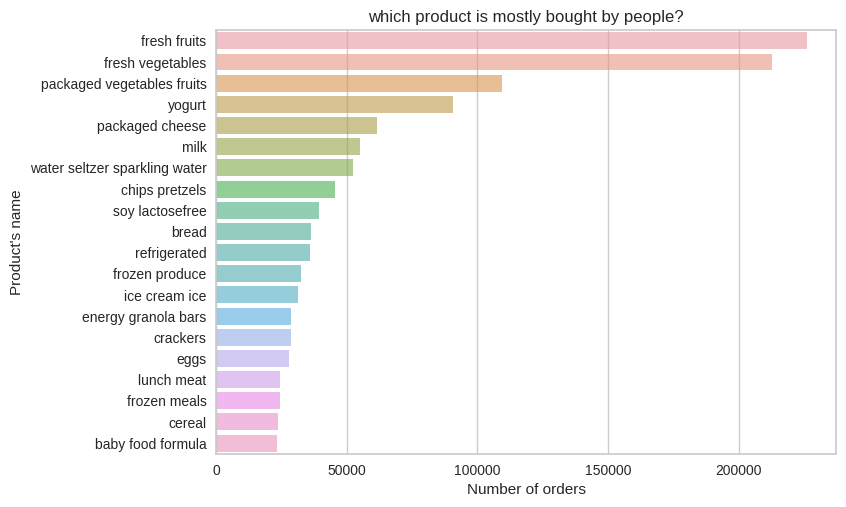

In [21]:
sns.barplot(data=top_products, x="Order Count", y="Product", alpha=0.6)
plt.title("which product is mostly bought by people?")
plt.xlabel("Number of orders")
plt.ylabel("Product's name")
plt.show()

### Most popular product in each category

In [28]:
department = pd.crosstab(df['department'], df['product_name'])
top_products = department.idxmax(axis=1)
top_products

department
alcohol                            beers coolers
babies                         baby food formula
bakery                                     bread
beverages          water seltzer sparkling water
breakfast                                 cereal
bulk                bulk grains rice dried goods
canned goods                 soup broth bouillon
dairy eggs                                yogurt
deli                                  lunch meat
dry goods pasta                        dry pasta
frozen                            frozen produce
household                            paper goods
international                        asian foods
meat seafood              hot dogs bacon sausage
missing                                  missing
other                                      other
pantry                        baking ingredients
personal care                       oral hygiene
pets                               cat food care
produce                             fresh fruits
snacks   

### relationship between departments and reorder

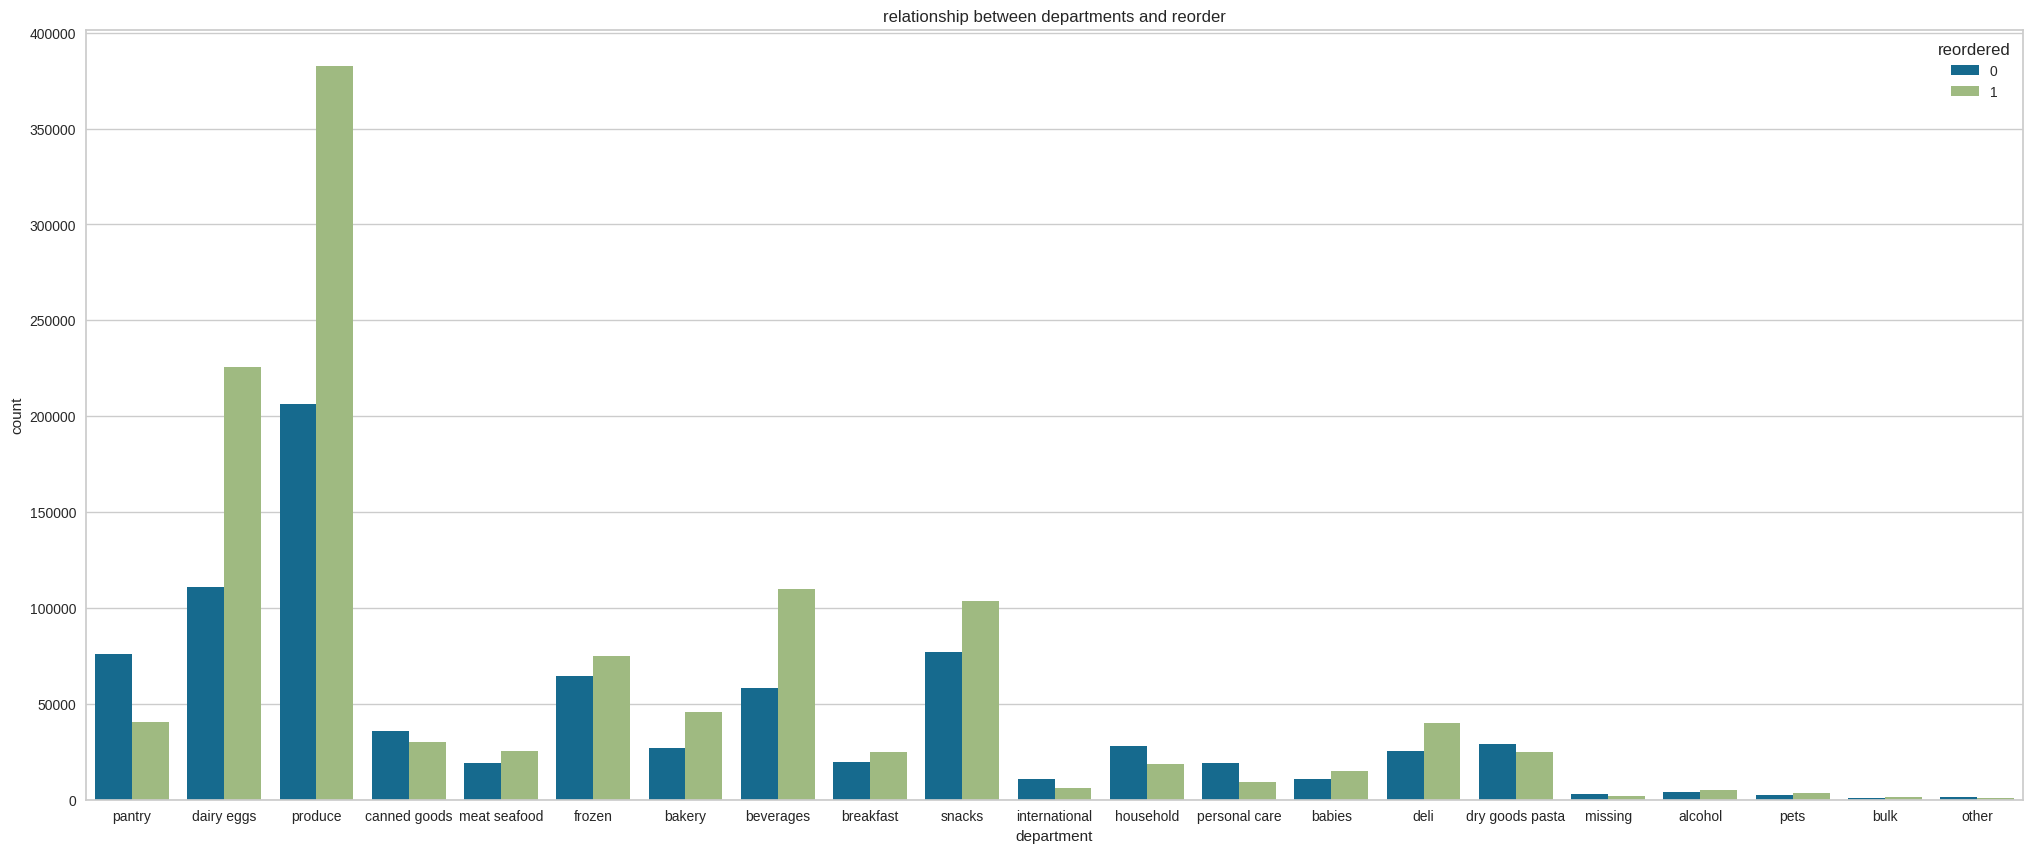

In [49]:
top_products = top_products[0:10]

cross_tab = pd.crosstab(top_products, df['reordered'])

plt.figure(figsize=(25,10))
sns.countplot(x='department', hue='reordered', data=df)
plt.title("relationship between departments and reorder")
plt.show()


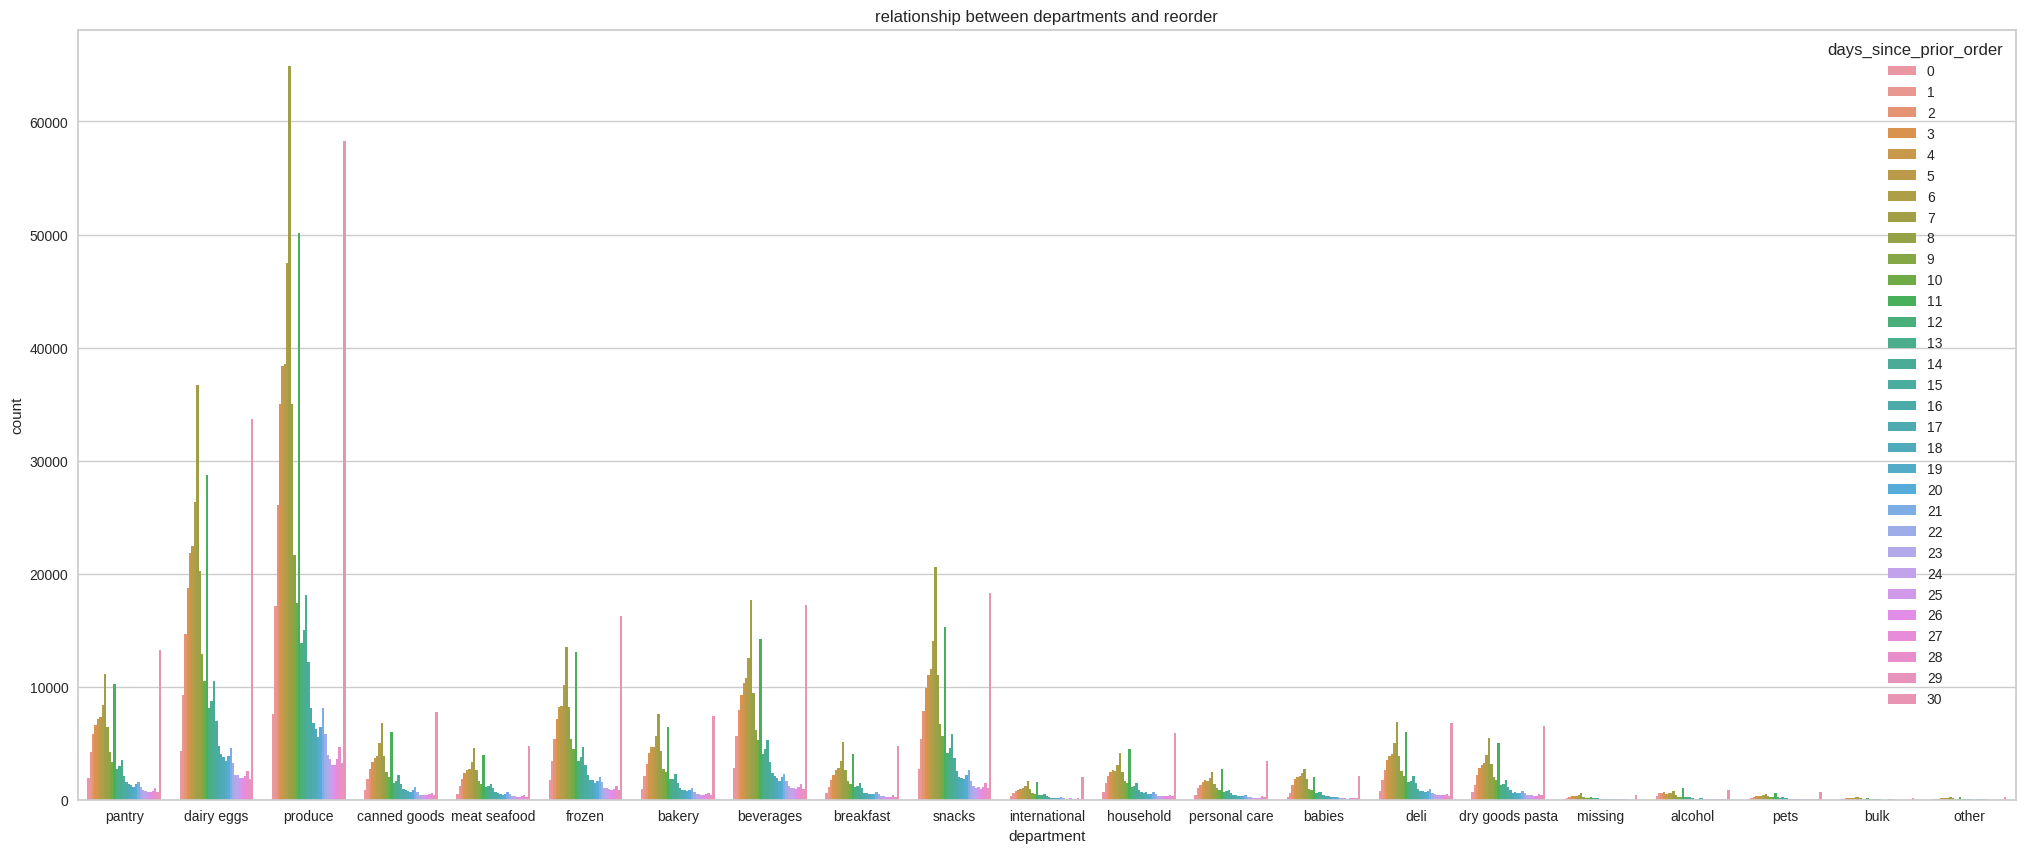

In [57]:
cross_tab = pd.crosstab(df['department'], df['days_since_prior_order'])

plt.figure(figsize=(25,10))
sns.countplot(x='department', hue='days_since_prior_order', data=df)
plt.title("relationship between departments and reorder")
plt.show()

### correlation matrix

/tmp/ipykernel_28/1935767641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


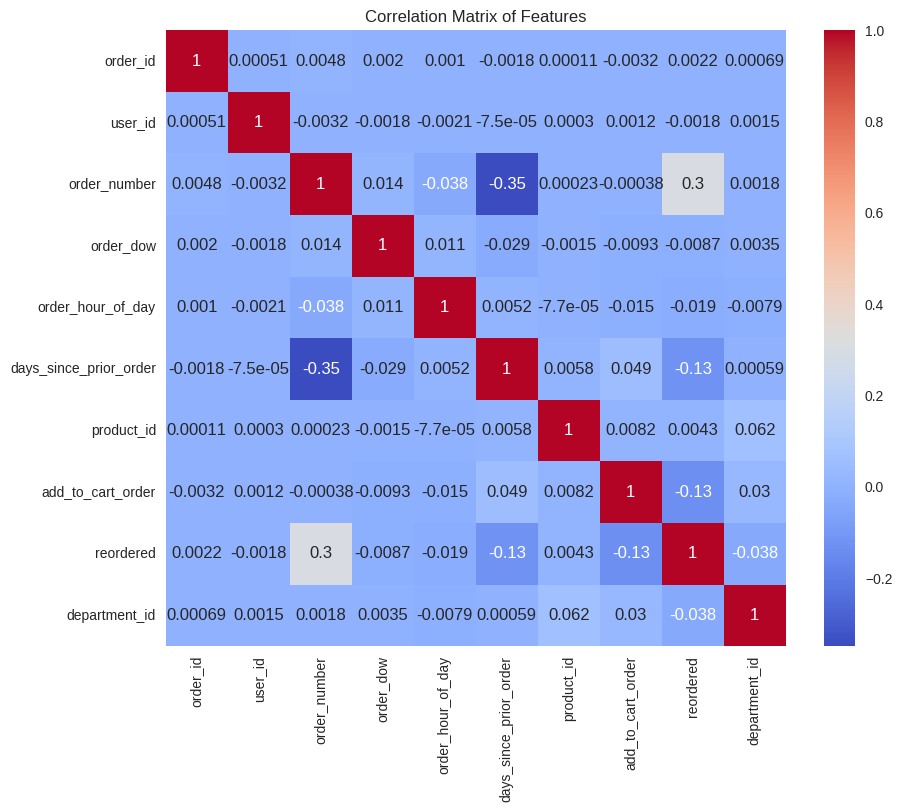

In [90]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Encoding data

In [29]:
objective_features = ['department', 'product_name']
label_encoder = LabelEncoder()
for i in objective_features:
    df[i] = label_encoder.fit_transform(df[i])

In [30]:
df['department'][0:20]

0     16
1      7
2      7
3     19
4     19
5      7
6      7
7      6
8     13
9     10
10    19
11    19
12     7
13     7
14    19
15    19
16    19
17     7
18     2
19    19
Name: department, dtype: int64

In [31]:
df['product_name'][0:20]

0       6
1     119
2      17
3      53
4      53
5     119
6     133
7      21
8     104
9      71
10     50
11     53
12     83
13    119
14     50
15     50
16     50
17     93
18     11
19     50
Name: product_name, dtype: int64

## scaling data

In [32]:
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(df.iloc[:, :-1])

# PART 2 : implementing k-means model

/opt/conda/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


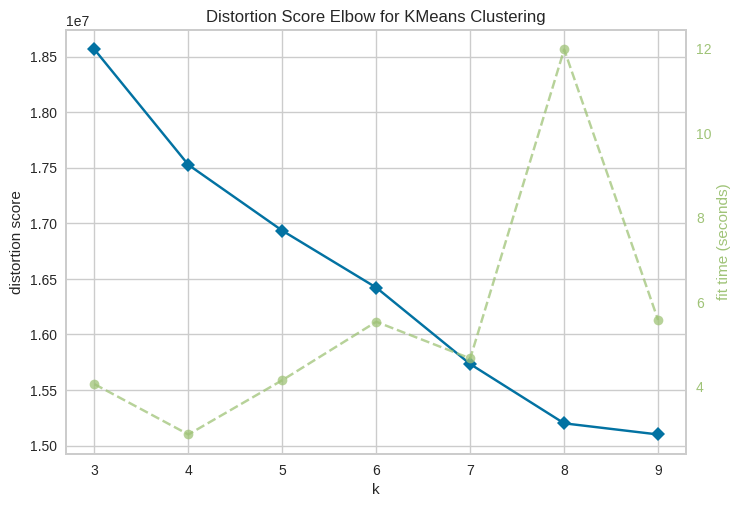

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
model = KMeans(n_init='auto',random_state=2048)
visualiser = KElbowVisualizer(model, k=(3,10))
visualiser.fit(scaled_data)        
visualiser.show()

In [40]:
inertia_scores_custom = []
silhouette_scores_custom = []
k_values_custom = range(3, 10) 
subsample_indices_custom = random.sample(range(len(scaled_data)), min(1000, len(scaled_data)))
data_subsample_custom = scaled_data[subsample_indices_custom]

for k_custom in k_values_custom:
    kmeans_custom = KMeans(n_clusters=k_custom, n_init='auto', random_state=2048)
    kmeans_custom.fit(scaled_data)
    
    inertia_scores_custom.append(kmeans_custom.inertia_)

    subsample_labels_custom = kmeans_custom.predict(data_subsample_custom)
    subsample_silhouette_score_custom = silhouette_score(data_subsample_custom, subsample_labels_custom)
    silhouette_scores_custom.append(subsample_silhouette_score_custom)

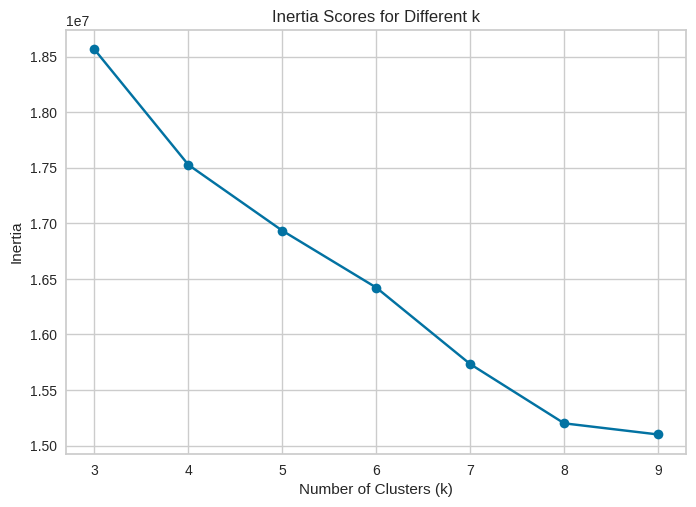

In [41]:
plt.plot(k_values_custom, inertia_scores_custom, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Scores for Different k')
plt.show()

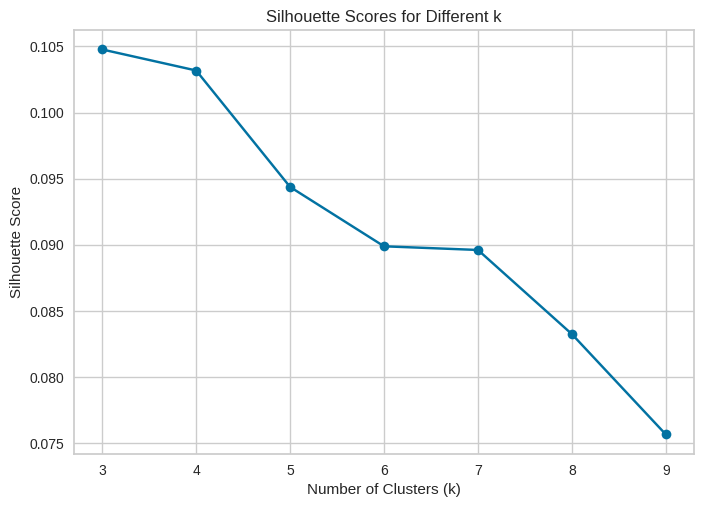

In [42]:
plt.plot(k_values_custom, silhouette_scores_custom, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

### fitting the best k 

In [44]:
kmeans_model = KMeans(n_clusters=5, n_init='auto', random_state=2048)
kmeans_model.fit(scaled_data)

KMeans(n_clusters=5, n_init='auto', random_state=2048)

In [45]:
df['cluster']= kmeans_model.labels_
df.head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,cluster
0,2425083,49125,1,2,18,11,17,1,0,13,16,6,2
1,2425083,49125,1,2,18,11,91,2,0,16,7,119,4
2,2425083,49125,1,2,18,11,36,3,0,16,7,17,4
3,2425083,49125,1,2,18,11,83,4,0,4,19,53,2
4,2425083,49125,1,2,18,11,83,5,0,4,19,53,2
5,2425083,49125,1,2,18,11,91,6,0,16,7,119,4
6,2425083,49125,1,2,18,11,120,7,0,16,7,133,4
7,2425083,49125,1,2,18,11,59,8,0,15,6,21,4
8,2425083,49125,1,2,18,11,35,9,0,12,13,104,2
9,1944304,162867,1,3,17,11,37,1,0,1,10,71,2


In [46]:
df['cluster'].value_counts()

0    516607
3    475786
4    435354
2    359056
1    232698
Name: cluster, dtype: int64

# PART 3 : visualizing data

## using PCA

In [102]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_model.labels_


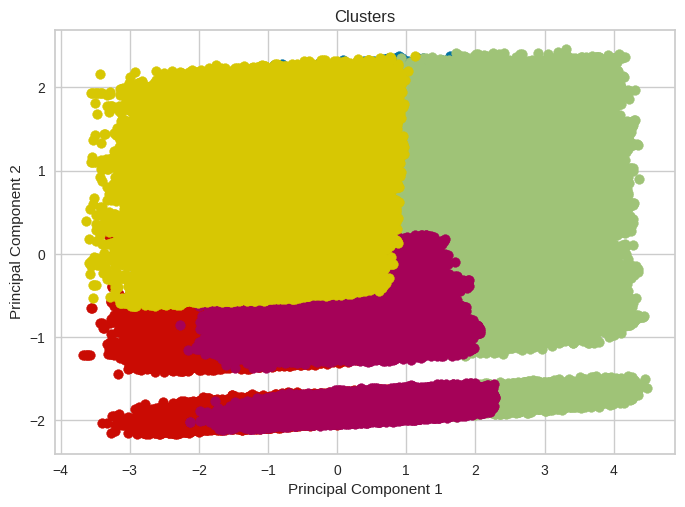

In [103]:
for cluster in range(5):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters')
plt.show()

In [104]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(scaled_data)
df_pca2 = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca2['Cluster'] = kmeans_model.labels_

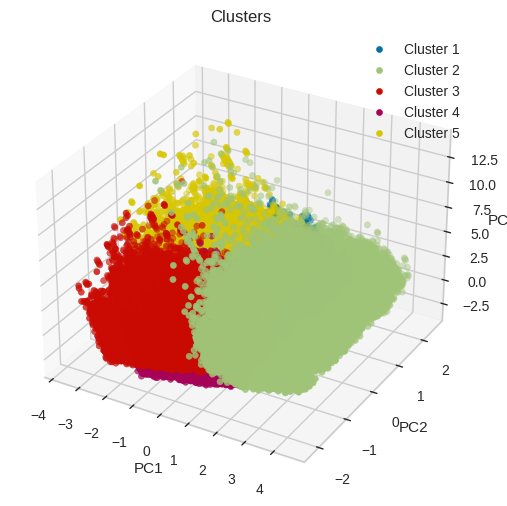

In [105]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(5):
    cluster_data = df_pca2[df_pca2['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster + 1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters')
ax.legend()
plt.show()

# PART 4 : Experimenting with other clustering algorithms 

## DBSCAN 

In [106]:
subset = resample(scaled_data, n_samples=5000, random_state=42)

In [107]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(subset)

In [108]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg_clustering.fit_predict(subset)

In [109]:
kmeans_silhouette = silhouette_score(subset, kmeans_model.predict(subset))

if len(set(dbscan_labels)) > 1:
    # Calculate the silhouette score
    dbscan_silhouette = silhouette_score(subset, dbscan_labels)
else:
    dbscan_silhouette = "DBSCAN identified only one cluster."
    
agg_silhouette = silhouette_score(subset, agg_labels)

In [110]:
print("Silhouette Scores:")
print("K-means:", kmeans_silhouette)
print("DBSCAN:", dbscan_silhouette)
print("Hierarchical Clustering:", agg_silhouette)
print()

Silhouette Scores:
K-means: 0.09236717828273076
DBSCAN: DBSCAN identified only one cluster.
Hierarchical Clustering: 0.07368430608775553



# PART 5 : use different numbers of components

In [111]:
num_components = [2, 4, 6, 8]
explained_variances = []
silhouette_scores = []

In [113]:
for n in num_components:
    print(f'step {n//2}')
    pca = PCA(n_components=n)
    data_pca = pca.fit_transform(subset)
    explained_variances.append(sum(pca.explained_variance_ratio_))
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(data_pca)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(data_pca, kmeans.labels_))

step 1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


step 2


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


step 3


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


step 4


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


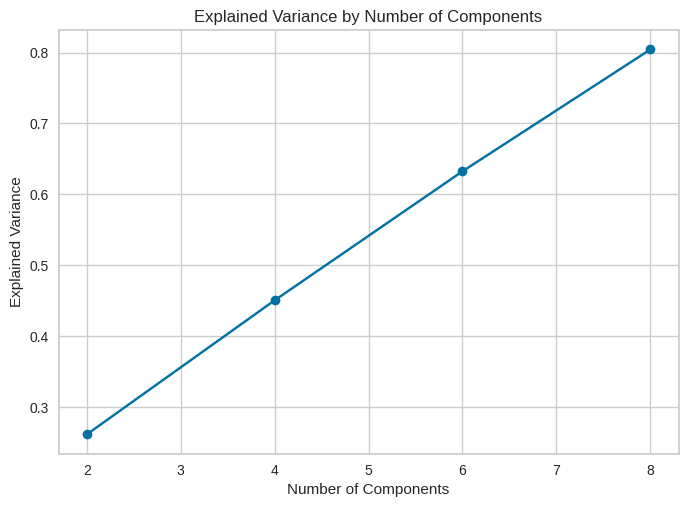

In [114]:
plt.plot(num_components, explained_variances, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.show()

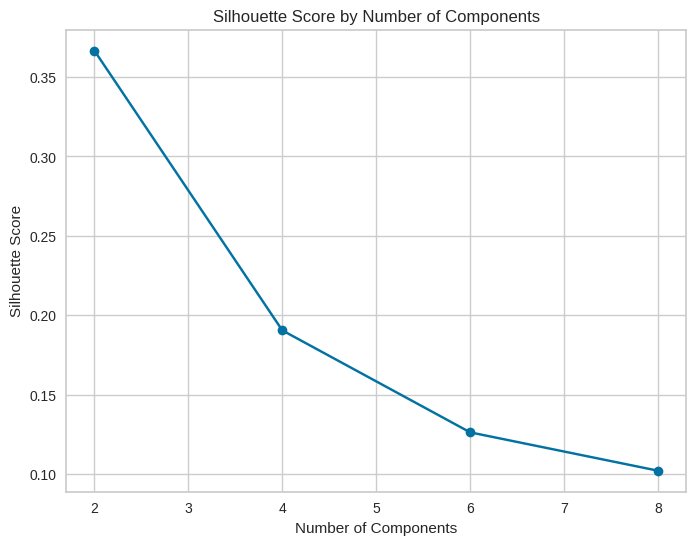

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(num_components, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score by Number of Components')
plt.show()

# feature engeneering part

### find most important features

Feature 0 -> order_id : 1.0000311749976503%
Feature 1 -> user_id : 1.0000315609391575%
Feature 2 -> order_number : 0.000471133592124072%
Feature 3 -> order_dow : 6.57360766396129e-05%
Feature 4 -> order_hour_of_day : 8.935691911214955e-05%
Feature 5 -> days_since_prior_order : 0.0012356737713180173%
Feature 6 -> product_id : 0.7954423061179672%
Feature 7 -> add_to_cart_order : 0.0026929381934966577%
Feature 8 -> reordered : 0.0002331313072859039%
Feature 9 -> department_id : 0.014241212976986379%
Feature 10 -> department : 0.04258234303018431%
Feature 11 -> product_name : 0.6043333468445167%
Feature 12 -> cluster : 0.0053344609281428396%


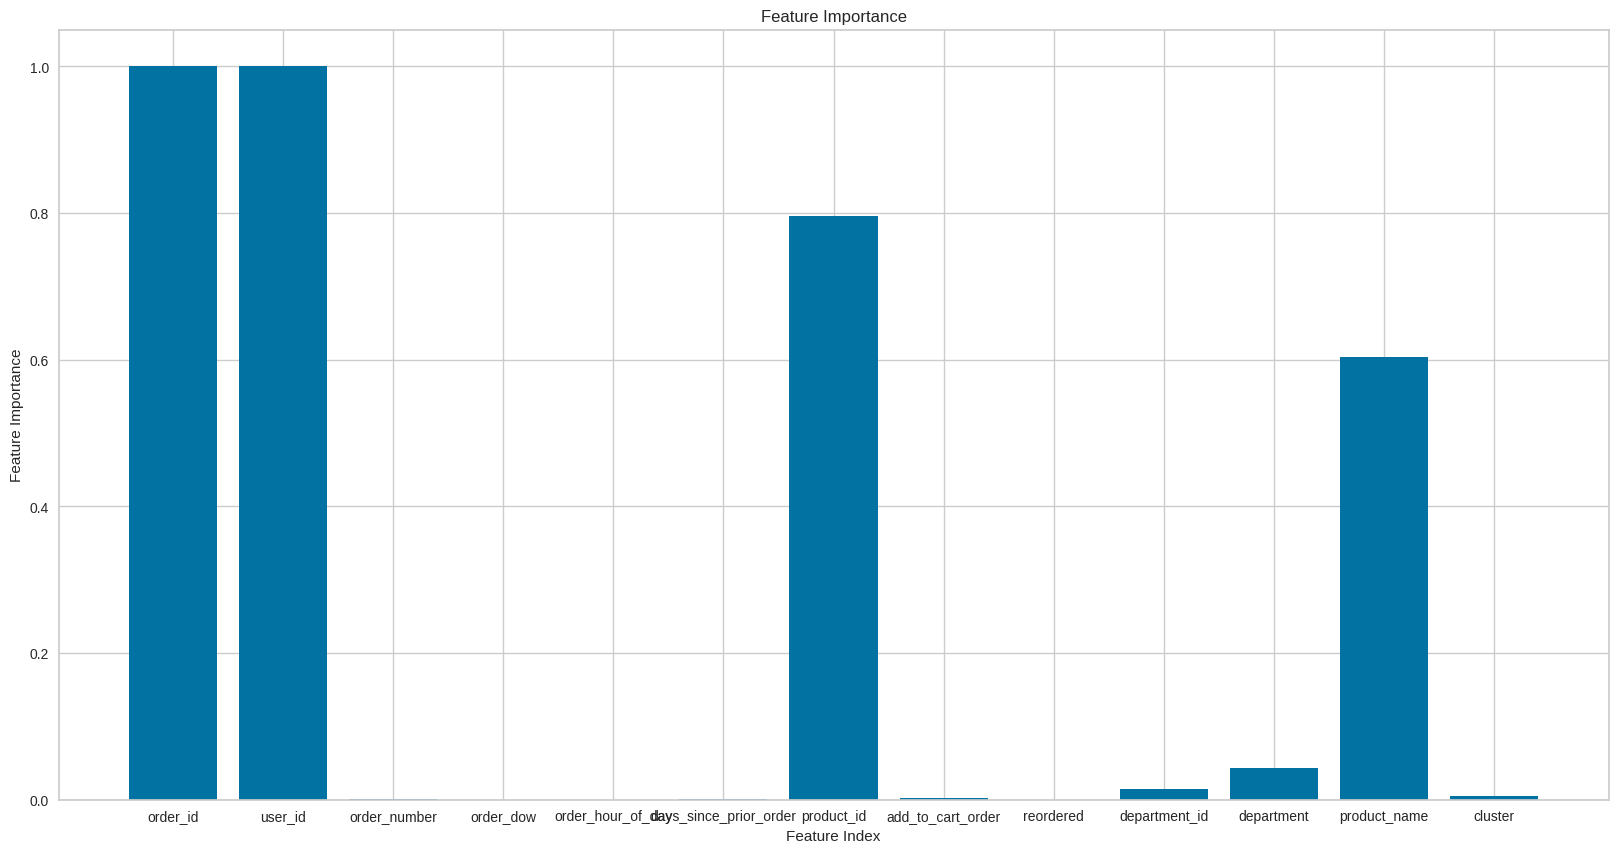

In [147]:
top_n_components = 3
pca = PCA(n_components=top_n_components)
data_pca = pca.fit_transform(df)
feature_importance = np.abs(pca.components_)


for idx in range(df.shape[1]):
    print(f"Feature {idx} -> {df.columns[idx]} : {feature_importance.sum(axis=0)[idx]}%")

plt.figure(figsize=(20,10))
plt.bar(df.columns, feature_importance.sum(axis=0))
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()


In [158]:
selected_features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered', 'department_id']
df_filtered = df.drop(selected_features, axis=1)
df_filtered_sample = resample(df_filtered, n_samples=50000, random_state=42)

In [159]:
subset = resample(scaled_data, n_samples=10000, random_state=42)

k = 5  
kmeans_model_filtered = KMeans(n_clusters=k, random_state=42)
kmeans_model_filtered.fit(df_filtered_sample)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [163]:
original_silhouette = silhouette_score(subset, kmeans_model.predict(subset))
original_inertia = kmeans_model.inertia_
print("Original K-means Silhouette Score:", original_silhouette)
print("Original K-means Inertia:", original_inertia)

Original K-means Silhouette Score: 0.09338047397727899
Original K-means Inertia: 16934521.355000548


In [162]:
filtered_silhouette = silhouette_score(df_filtered_sample, kmeans_model_filtered.labels_)
filtered_inertia = kmeans_model_filtered.inertia_
print("Filtered K-means Silhouette Score:", filtered_silhouette)
print("Filtered K-means Inertia:", filtered_inertia)

Filtered K-means Silhouette Score: 0.5298672062884408
Filtered K-means Inertia: 2130411261927395.5


In [182]:
df['order_dow_category'] = LabelEncoder().fit_transform(df['order_dow'])
df['avg_days_since_prior_order'] = df.groupby('user_id')['days_since_prior_order'].transform('mean')

In [186]:
features = ['order_number', 'order_hour_of_day', 'add_to_cart_order', 'reordered', 'order_dow_category', 'avg_days_since_prior_order', 'department_id']

In [187]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[features])

In [188]:
kmeans_new = KMeans(n_clusters=5, random_state=42)
kmeans_new.fit(data_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [189]:
df_sample = resample(data_scaled, n_samples=50000, random_state=42)

In [190]:
silhouette_new = silhouette_score(df_sample, kmeans_new.predict(df_sample))
inertia_new = kmeans_new.inertia_

In [191]:
print("Original K-means Silhouette Score:", original_silhouette)
print("Original K-means Inertia:", original_inertia)
print("New K-means Silhouette Score:", silhouette_new)
print("New K-means Inertia:", inertia_new)

Original K-means Silhouette Score: 0.09338047397727899
Original K-means Inertia: 16934521.355000548
New K-means Silhouette Score: 0.15871459493003096
New K-means Inertia: 8905079.397437796


In [193]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(scaled_data)

In [194]:
df_pca = pd.DataFrame(data=data_pca, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

In [195]:
df_pca['Cluster (Original)'] = kmeans_model.labels_
df_pca['Cluster (Filtered)'] = kmeans_new.labels_

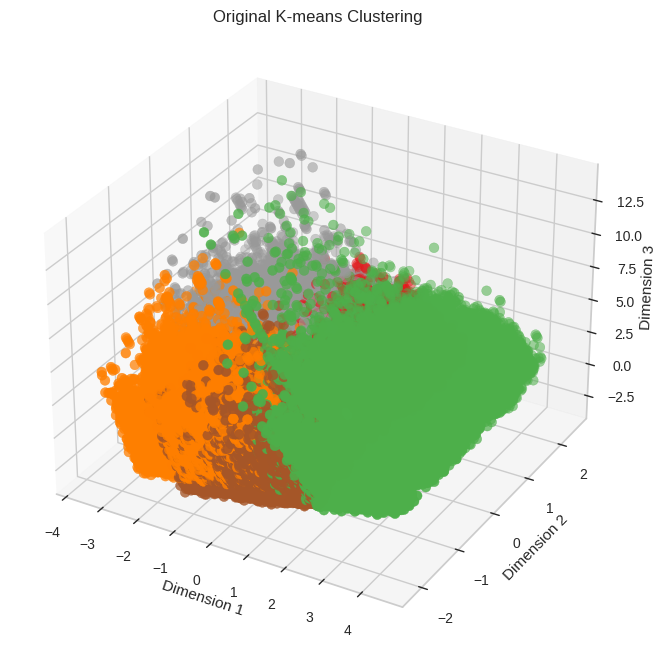

In [196]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['Dimension 1'], df_pca['Dimension 2'], df_pca['Dimension 3'], c=df_pca['Cluster (Original)'], cmap='Set1', s=50)
ax.set_title('Original K-means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

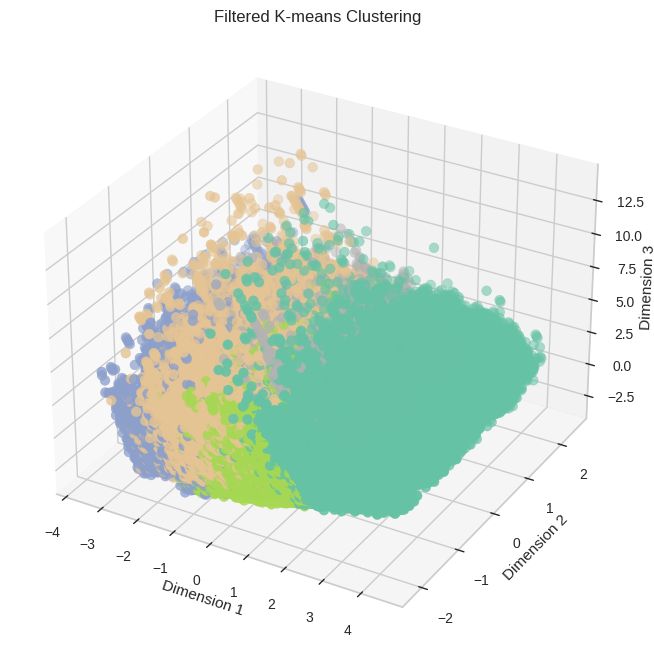

In [197]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['Dimension 1'], df_pca['Dimension 2'], df_pca['Dimension 3'], c=df_pca['Cluster (Filtered)'], cmap='Set2', s=50)
ax.set_title('Filtered K-means Clustering')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.show()

# gaining some insights about our dataset

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


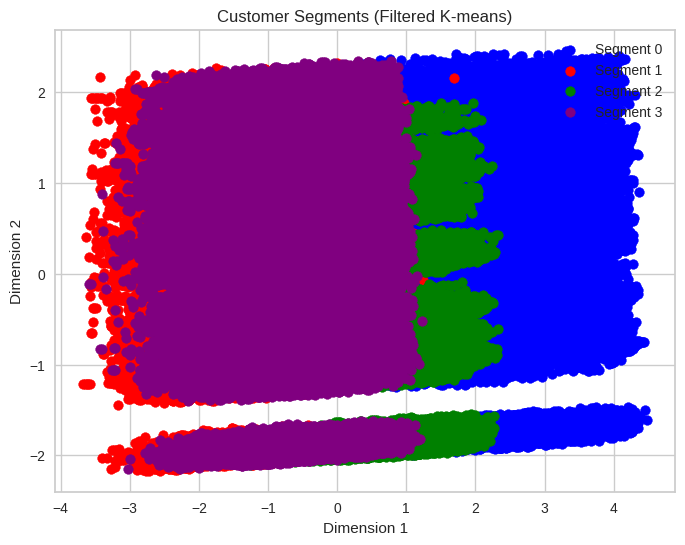

In [198]:
segment_0 = df_pca[df_pca['Cluster (Filtered)'] == 0]
segment_1 = df_pca[df_pca['Cluster (Filtered)'] == 1]
segment_2 = df_pca[df_pca['Cluster (Filtered)'] == 2]
segment_3 = df_pca[df_pca['Cluster (Filtered)'] == 3]

plt.figure(figsize=(8, 6))

plt.scatter(segment_0['Dimension 1'], segment_0['Dimension 2'], color='blue', label='Segment 0')
plt.scatter(segment_1['Dimension 1'], segment_1['Dimension 2'], color='red', label='Segment 1')
plt.scatter(segment_2['Dimension 1'], segment_2['Dimension 2'], color='green', label='Segment 2')
plt.scatter(segment_3['Dimension 1'], segment_3['Dimension 2'], color='purple', label='Segment 3')

plt.title('Customer Segments (Filtered K-means)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()
